# Answer

## Homework

In [1]:
# 1. Function for sampling k centroids from the original data
import numpy as np
def generate_centroid(features, k):
    ## features: the features, should be a array
    ## k: number of centroids
    m = features.shape[0]
    index = np.random.choice(m, k, replace=False)
    centroid = x[index, :]
    return centroid

In [2]:
# 2. A function to compute the distance between the data and centroids
def get_distance(features, centroid):
    n = features.shape[0]
    p = centroid.shape[0]
    distance = np.ones([n, p])
    for i in range(n):
        for j in range(p):
            distance[i, j] = np.sum((features[i, :] - centroid[j, :]) ** 2)
    return distance

In [3]:
# 3. Given a distance matrix, return the index of minimal number in each row
def get_label(distance):
    return distance.argmin(1)

In [4]:
# 4. Update the centroids.
def get_centroid(features, label):
    unique_label = np.unique(label)
    k = unique_label.shape[0]
    centroid = np.ones([k, features.shape[1]])
    for i in range(k):
        index = [ j == unique_label[i] for j in label ]
        index = np.array(index)
        centroid[i, :] = np.mean(features[index, :], 0)
    return centroid

In [5]:
# 5. Combine them together.
def kmeans(x, k, centroid = None, max_itre = 300):
    if centroid == None:
        centroid = generate_centroid(x, k)
    i = 0
    while i <= max_itre:
        i += 1
        distance = get_distance(x, centroid)
        label = get_label(distance)
        centroid_update = get_centroid(x, label)
        if np.all(centroid_update == centroid):
            break
        else:
            centroid = centroid_update
    return label, centroid

In [6]:
# 6. Test.
# 1. generate random samples
x1 = np.random.randn(50, 2) * 5 + 10
x2 = np.random.randn(50, 2) * 5 - 10
x = np.row_stack([x1, x2])

In [7]:
# 2. fit
label, centroid = kmeans(x, 2)
print label
print centroid

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  9.97888307  10.82799033]
 [-11.86354151  -9.41227296]]


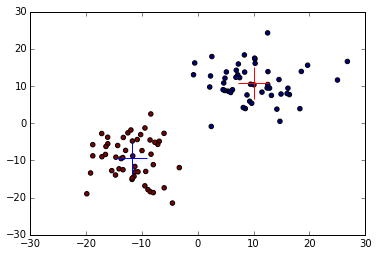

In [8]:
# 3. plot
from matplotlib import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (6, 4.0)
pylab.scatter(x[:, 0], x[:, 1], c = label)
pylab.scatter(centroid[:, 0], centroid[:, 1], s = 1000, marker= '+', c=['red', 'blue'])